In [44]:
import pandas as pd
import numpy as np
import csv
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from graph_tools import Graph
from distinctiveness.dc import distinctiveness
import networkx as nx
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [45]:
scraping_twitter = pd.read_csv('Scraping_Twitter.csv')
scraping_twitter.head(5)

,"{""created_at"":""Tue Mar 09 00:52:58 +0000 2021""",id:1369088789377921025,"id_str:""1369088789377921025""","text:""yes. #pepsi is trash. Britney Spears is not.""","source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,Unnamed: 689,Unnamed: 690,Unnamed: 691,Unnamed: 692,Unnamed: 693,Unnamed: 694,Unnamed: 695,Unnamed: 696,Unnamed: 697,Unnamed: 698
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""created_at"":""Tue Mar 09 00:56:01 +0000 2021""",id:1369089558504214531,"id_str:""1369089558504214531""","text:""RT @elyinkaccount2: https:\/\/t.co\/l6Qo...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""created_at"":""Tue Mar 09 00:58:11 +0000 2021""",id:1369090104074059777,"id_str:""1369090104074059777""","text:""RT @realEscanor: Coca Cola wants me to b...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""created_at"":""Tue Mar 09 00:58:42 +0000 2021""",id:1369090231522238466,"id_str:""1369090231522238466""","text:""RT @CECEADDAMS: Throwback \ud83c\udf51\n...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""created_at"":""Tue Mar 09 00:58:49 +0000 2021""",id:1369090260928520193,"id_str:""1369090260928520193""","text:""RT @CECEADDAMS: \ud83c\udf51HANDLEBARS\u...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
scraping_twitter = scraping_twitter.rename(columns={'text:"yes. #pepsi is trash. Britney Spears is not."':'text', 
                                                    '{"created_at":"Tue Mar 09 00:52:58 +0000 2021"':'Fecha de elaboración', 
                                                    'id:1369088789377921025':'id_usuario', 
                                                    'source:"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e"':'Source',
                                                    'id_str:"1369088789377921025"':'id_str', 'lang:"en"':'language', 
                                                    'favorite_count:0':'favorite_count', 'reply_count:0':'reply_count',
                                                    'retweet_count:0':'retweet_count', 'name:"Jordyn\u2764\ufe0f"':'name', 
                                                    'screen_name:"colaxqueen"':'screen_name', 'filter_level:"low".1':'filter_level', 'symbols:[]}':'symbols',
                                                    'user_mentions:[].1':'user_mentions'})

In [47]:
scraping_twitter.columns

Index(['Fecha de elaboración', 'id_usuario', 'id_str', 'text',
       'source:"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e"',
       'truncated:false', 'in_reply_to_status_id:null',
       'in_reply_to_status_id_str:null', 'in_reply_to_user_id:null',
       'in_reply_to_user_id_str:null',
       ...
       'Unnamed: 689', 'Unnamed: 690', 'Unnamed: 691', 'Unnamed: 692',
       'Unnamed: 693', 'Unnamed: 694', 'Unnamed: 695', 'Unnamed: 696',
       'Unnamed: 697', 'Unnamed: 698'],
      dtype='object', length=699)

In [48]:
missing_data = scraping_twitter.isnull().sum()
missing_data

Fecha de elaboración                                                                                                           0
id_usuario                                                                                                                     0
id_str                                                                                                                         0
text                                                                                                                           0
source:"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e"       0
                                                                                                                            ... 
Unnamed: 694                                                                                                                1483
Unnamed: 695                                                                                     

In [49]:
scraping_twitter.head(5)

,Fecha de elaboración,id_usuario,id_str,text,"source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,Unnamed: 689,Unnamed: 690,Unnamed: 691,Unnamed: 692,Unnamed: 693,Unnamed: 694,Unnamed: 695,Unnamed: 696,Unnamed: 697,Unnamed: 698
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""created_at"":""Tue Mar 09 00:56:01 +0000 2021""",id:1369089558504214531,"id_str:""1369089558504214531""","text:""RT @elyinkaccount2: https:\/\/t.co\/l6Qo...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""created_at"":""Tue Mar 09 00:58:11 +0000 2021""",id:1369090104074059777,"id_str:""1369090104074059777""","text:""RT @realEscanor: Coca Cola wants me to b...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""created_at"":""Tue Mar 09 00:58:42 +0000 2021""",id:1369090231522238466,"id_str:""1369090231522238466""","text:""RT @CECEADDAMS: Throwback \ud83c\udf51\n...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""created_at"":""Tue Mar 09 00:58:49 +0000 2021""",id:1369090260928520193,"id_str:""1369090260928520193""","text:""RT @CECEADDAMS: \ud83c\udf51HANDLEBARS\u...","source:""\u003ca href=\""http:\/\/twitter.com\/d...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
scraping_twitter = scraping_twitter.drop(['Unnamed: 698', 'Unnamed: 697', 'Unnamed: 696', 'Unnamed: 695', 'Unnamed: 694', 'Unnamed: 693', 'Unnamed: 692', 'Unnamed: 691','Unnamed: 690', 'Unnamed: 689',
                                         'Unnamed: 688', 'Unnamed: 687', 'Unnamed: 686', 'Unnamed: 685', 'Unnamed: 684', 'Unnamed: 683', 'Unnamed: 682', 'Unnamed: 681', 'Unnamed: 680', 'Unnamed: 679',
                                         'Unnamed: 678', 'Unnamed: 677', 'Unnamed: 676', 'Unnamed: 675', 'Unnamed: 674', 'Unnamed: 673', 'Unnamed: 672', 'Unnamed: 671', 'Unnamed: 670', 'Unnamed: 669',
                                         'Unnamed: 668', 'Unnamed: 667', 'Unnamed: 666', 'Unnamed: 665', 'Unnamed: 664', 'Unnamed: 663', 'Unnamed: 662', 'Unnamed: 661', 'Unnamed: 660', 'Unnamed: 659',
                                         'Unnamed: 658', 'Unnamed: 657', 'Unnamed: 656', 'Unnamed: 655', 'Unnamed: 654', 'Unnamed: 653', 'Unnamed: 652', 'Unnamed: 651', 'Unnamed: 650', 'Unnamed: 649',
                                         'Unnamed: 648', 'Unnamed: 647', 'Unnamed: 646', 'Unnamed: 645', 'Unnamed: 644', 'Unnamed: 643', 'Unnamed: 642', 'Unnamed: 641', 'Unnamed: 640', 'Unnamed: 639',
                                         'Unnamed: 638', 'Unnamed: 637', 'Unnamed: 636', 'Unnamed: 635', 'Unnamed: 634', 'Unnamed: 633', 'Unnamed: 632', 'Unnamed: 631', 'Unnamed: 630', 'Unnamed: 629',
                                         'Unnamed: 628', 'Unnamed: 627', 'Unnamed: 626', 'Unnamed: 625', 'Unnamed: 624', 'Unnamed: 623', 'Unnamed: 622', 'Unnamed: 621', 'Unnamed: 620', 'Unnamed: 619',
                                         'Unnamed: 618', 'Unnamed: 617', 'Unnamed: 616', 'Unnamed: 615', 'Unnamed: 614', 'Unnamed: 613', 'Unnamed: 612', 'Unnamed: 611', 'Unnamed: 610', 'Unnamed: 609',
                                         'Unnamed: 608', 'Unnamed: 607', 'Unnamed: 606', 'Unnamed: 605', 'Unnamed: 604', 'Unnamed: 603', 'Unnamed: 602', 'Unnamed: 601', 'Unnamed: 600',
                                         'Unnamed: 599', 'Unnamed: 598', 'Unnamed: 597', 'Unnamed: 596', 'Unnamed: 595', 'Unnamed: 594', 'Unnamed: 593', 'Unnamed: 592', 'Unnamed: 591', 'Unnamed: 590', 
                                         'Unnamed: 589', 'Unnamed: 588', 'Unnamed: 587', 'Unnamed: 586', 'Unnamed: 585', 'Unnamed: 584', 'Unnamed: 583', 'Unnamed: 582', 'Unnamed: 581', 'Unnamed: 580',
                                         'Unnamed: 579', 'Unnamed: 578', 'Unnamed: 577', 'Unnamed: 576', 'Unnamed: 575', 'Unnamed: 574', 'Unnamed: 573', 'Unnamed: 572', 'Unnamed: 571', 'Unnamed: 570',
                                         'Unnamed: 569', 'Unnamed: 568', 'Unnamed: 567', 'Unnamed: 566', 'Unnamed: 565', 'Unnamed: 564', 'Unnamed: 563', 'Unnamed: 562', 'Unnamed: 561', 'Unnamed: 560',
                                         'Unnamed: 559', 'Unnamed: 558', 'Unnamed: 557', 'Unnamed: 556', 'Unnamed: 555', 'Unnamed: 554', 'Unnamed: 553', 'Unnamed: 552', 'Unnamed: 551', 'Unnamed: 550',
                                         'Unnamed: 549', 'Unnamed: 548', 'Unnamed: 547', 'Unnamed: 546', 'Unnamed: 545', 'Unnamed: 544', 'Unnamed: 543', 'Unnamed: 542', 'Unnamed: 541', 'Unnamed: 540',
                                         'Unnamed: 539', 'Unnamed: 538', 'Unnamed: 537', 'Unnamed: 536', 'Unnamed: 535', 'Unnamed: 534', 'Unnamed: 533', 'Unnamed: 532', 'Unnamed: 531', 'Unnamed: 530',
                                         'Unnamed: 529', 'Unnamed: 528', 'Unnamed: 527', 'Unnamed: 526', 'Unnamed: 525', 'Unnamed: 524', 'Unnamed: 523', 'Unnamed: 522', 'Unnamed: 521', 'Unnamed: 520',
                                         'Unnamed: 519', 'Unnamed: 518', 'Unnamed: 517', 'Unnamed: 516', 'Unnamed: 515', 'Unnamed: 514', 'Unnamed: 513', 'Unnamed: 512', 'Unnamed: 511', 'Unnamed: 510',
                                         'Unnamed: 509', 'Unnamed: 508', 'Unnamed: 507', 'Unnamed: 506', 'Unnamed: 505', 'Unnamed: 504', 'Unnamed: 503', 'Unnamed: 502', 'Unnamed: 501', 'Unnamed: 500',
                                         'Unnamed: 499', 'Unnamed: 498', 'Unnamed: 497', 'Unnamed: 496', 'Unnamed: 495', 'Unnamed: 494', 'Unnamed: 493', 'Unnamed: 492', 'Unnamed: 491', 'Unnamed: 490', 
                                         'Unnamed: 489', 'Unnamed: 488', 'Unnamed: 487', 'Unnamed: 486', 'Unnamed: 485', 'Unnamed: 484', 'Unnamed: 483', 'Unnamed: 482', 'Unnamed: 481', 'Unnamed: 480',
                                         'Unnamed: 479', 'Unnamed: 478', 'Unnamed: 477', 'Unnamed: 476', 'Unnamed: 475', 'Unnamed: 474', 'Unnamed: 473', 'Unnamed: 472', 'Unnamed: 471', 'Unnamed: 470',
                                         'Unnamed: 469', 'Unnamed: 468', 'Unnamed: 467', 'Unnamed: 466', 'Unnamed: 465', 'Unnamed: 464', 'Unnamed: 463', 'Unnamed: 462', 'Unnamed: 461', 'Unnamed: 460',
                                         'Unnamed: 459', 'Unnamed: 458', 'Unnamed: 457', 'Unnamed: 456', 'Unnamed: 455', 'Unnamed: 454', 'Unnamed: 453', 'Unnamed: 452', 'Unnamed: 451', 'Unnamed: 450',
                                         'Unnamed: 449', 'Unnamed: 448', 'Unnamed: 447', 'Unnamed: 446', 'Unnamed: 445', 'Unnamed: 444', 'Unnamed: 443', 'Unnamed: 442', 'Unnamed: 441', 'Unnamed: 440',
                                         'Unnamed: 439', 'Unnamed: 438', 'Unnamed: 437', 'Unnamed: 436', 'Unnamed: 435', 'Unnamed: 434', 'Unnamed: 433', 'Unnamed: 432', 'Unnamed: 431', 'Unnamed: 430',
                                         'Unnamed: 429', 'Unnamed: 428', 'Unnamed: 427', 'Unnamed: 426', 'Unnamed: 425', 'Unnamed: 424', 'Unnamed: 423', 'Unnamed: 422', 'Unnamed: 421', 'Unnamed: 420',
                                         'Unnamed: 419', 'Unnamed: 418', 'Unnamed: 417', 'Unnamed: 416', 'Unnamed: 415', 'Unnamed: 414', 'Unnamed: 413', 'Unnamed: 412', 'Unnamed: 411', 'Unnamed: 410',
                                         'Unnamed: 409', 'Unnamed: 408', 'Unnamed: 407', 'Unnamed: 406', 'Unnamed: 405', 'Unnamed: 404', 'Unnamed: 403', 'Unnamed: 402', 'Unnamed: 401', 'Unnamed: 400',
                                         'Unnamed: 399', 'Unnamed: 398', 'Unnamed: 397', 'Unnamed: 396', 'Unnamed: 395', 'Unnamed: 394', 'Unnamed: 393', 'Unnamed: 392', 'Unnamed: 391', 'Unnamed: 390', 
                                         'Unnamed: 389', 'Unnamed: 388', 'Unnamed: 387', 'Unnamed: 386', 'Unnamed: 385', 'Unnamed: 384', 'Unnamed: 383', 'Unnamed: 382', 'Unnamed: 381', 'Unnamed: 380',
                                         'Unnamed: 379', 'Unnamed: 378', 'Unnamed: 377', 'Unnamed: 376', 'Unnamed: 375', 'Unnamed: 374', 'Unnamed: 373', 'Unnamed: 372', 'Unnamed: 371', 'Unnamed: 370',
                                         'Unnamed: 369', 'Unnamed: 368', 'Unnamed: 367', 'Unnamed: 366', 'Unnamed: 365', 'Unnamed: 364', 'Unnamed: 363', 'Unnamed: 362', 'Unnamed: 361', 'Unnamed: 360',
                                         'Unnamed: 359', 'Unnamed: 358', 'Unnamed: 357', 'Unnamed: 356', 'Unnamed: 355', 'Unnamed: 354', 'Unnamed: 353', 'Unnamed: 352', 'Unnamed: 351', 'Unnamed: 350',
                                         'Unnamed: 349', 'Unnamed: 348', 'Unnamed: 347', 'Unnamed: 346', 'Unnamed: 345', 'Unnamed: 344', 'Unnamed: 343', 'Unnamed: 342', 'Unnamed: 341', 'Unnamed: 340',
                                         'Unnamed: 339', 'Unnamed: 338', 'Unnamed: 337', 'Unnamed: 336', 'Unnamed: 335', 'Unnamed: 334', 'Unnamed: 333', 'Unnamed: 332', 'Unnamed: 331', 'Unnamed: 330',
                                         'Unnamed: 329', 'Unnamed: 328', 'Unnamed: 327', 'Unnamed: 326', 'Unnamed: 325', 'Unnamed: 324', 'Unnamed: 323', 'Unnamed: 322', 'Unnamed: 321', 'Unnamed: 320',
                                         'Unnamed: 319', 'Unnamed: 318', 'Unnamed: 317', 'Unnamed: 316', 'Unnamed: 315', 'Unnamed: 314', 'Unnamed: 313', 'Unnamed: 312', 'Unnamed: 311', 'Unnamed: 310',
                                         'Unnamed: 309', 'Unnamed: 308', 'Unnamed: 307', 'Unnamed: 306', 'Unnamed: 305', 'Unnamed: 304', 'Unnamed: 303', 'Unnamed: 302', 'Unnamed: 301', 'Unnamed: 300',
                                         'Unnamed: 299', 'Unnamed: 298', 'Unnamed: 297', 'Unnamed: 296', 'Unnamed: 295', 'Unnamed: 294', 'Unnamed: 293', 'Unnamed: 292', 'Unnamed: 291', 'Unnamed: 290', 
                                         'Unnamed: 289', 'Unnamed: 288', 'Unnamed: 287', 'Unnamed: 286', 'Unnamed: 285', 'Unnamed: 284', 'Unnamed: 283', 'Unnamed: 282', 'Unnamed: 281', 'Unnamed: 280',
                                         'Unnamed: 279', 'Unnamed: 278', 'Unnamed: 277', 'Unnamed: 276', 'Unnamed: 275', 'Unnamed: 274', 'Unnamed: 273'], axis=1)

In [51]:
scraping_twitter = scraping_twitter.drop(['favorited:false.1', 'retweeted:false.1', 'language', 'urls:[].1', 'indices:[5', '11]}]',
                                         'timestamp_ms:"1615251178484"}'], axis=1)

In [65]:
scraping_twitter.isnull().sum()

Fecha de elaboración                                                                                                          0
id_usuario                                                                                                                    0
id_str                                                                                                                        0
text                                                                                                                          0
source:"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e"      0
                                                                                                                           ... 
entities:{"hashtags":[{"text":"pepsi"                                                                                       584
user_mentions                                                                                           

In [66]:
scraping_twitter.columns

Index(['Fecha de elaboración', 'id_usuario', 'id_str', 'text',
       'source:"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e"',
       'truncated:false', 'in_reply_to_status_id:null',
       'in_reply_to_status_id_str:null', 'in_reply_to_user_id:null',
       'in_reply_to_user_id_str:null',
       ...
       'is_quote_status:true', 'quote_count:0', 'reply_count', 'retweet_count',
       'favorite_count', 'entities:{"hashtags":[{"text":"pepsi"',
       'user_mentions', 'symbols', 'filter_level', 'texto_tokenizado'],
      dtype='object', length=267)

In [67]:
scraping_twitter.to_csv('scraping_twitter_listo.csv')

In [68]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\text]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"
print(test)
print(limpiar_tokenizar(texto=test))


Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining
['mplo', 'limpi', 'za', 'ci', 'nciad', 'da', 'os', 'mining']


In [69]:
scraping_twitter['texto_tokenizado'] = scraping_twitter['text'].apply(lambda x: limpiar_tokenizar(x))
scraping_twitter[['text', 'texto_tokenizado']].head()

,text,texto_tokenizado
0,"text:""Pepsi drinkers are the cool kids of the ...","[psi, drink, rs, ar, cool, kids, of, highway, ..."
1,"text:""RT @elyinkaccount2: https:\/\/t.co\/l6Qo...","[lyinkaccoun, ud, udc, ud, udc, ud, udc, ud, u..."
2,"text:""RT @realEscanor: Coca Cola wants me to b...","[al, scanor, coca, cola, wan, ss, whi, nso, wa..."
3,"text:""RT @CECEADDAMS: Throwback \ud83c\udf51\n...","[addams, hrowback, ud, udf, ud, udcf, kalinlon..."
4,"text:""RT @CECEADDAMS: \ud83c\udf51HANDLEBARS\u...","[addams, ud, udf, handl, bars, ud, udf, bimbo,..."


In [70]:
tweets = scraping_twitter.explode(column='texto_tokenizado')
tweets = tweets.rename(columns={'texto_tokenizado':'token'})
tweets.head(3)

,Fecha de elaboración,id_usuario,id_str,text,"source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,is_quote_status:true,quote_count:0,reply_count,retweet_count,favorite_count,"entities:{""hashtags"":[{""text"":""pepsi""",user_mentions,symbols,filter_level,token
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,psi
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drink
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs


In [71]:
tweets[tweets.text.str.contains('text')]

,Fecha de elaboración,id_usuario,id_str,text,"source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,is_quote_status:true,quote_count:0,reply_count,retweet_count,favorite_count,"entities:{""hashtags"":[{""text"":""pepsi""",user_mentions,symbols,filter_level,token
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,psi
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drink
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
0,"{""created_at"":""Tue Mar 09 00:54:13 +0000 2021""",id:1369089102931460100,"id_str:""1369089102931460100""","text:""Pepsi drinkers are the cool kids of the ...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,"{""created_at"":""Thu Mar 11 22:16:21 +0000 2021""",id:1370136538164645889,"id_str:""1370136538164645889""","text:""Which celeb do you wanna see get faked n...",display_text_range:[0,140],"source:""\u003ca href=\""https:\/\/mobile.twitte...",truncated:true,in_reply_to_status_id:null,in_reply_to_status_id_str:null,...,"id_str:""1370136362339471362""",indices:[251,274],"media_url:""http:\/\/pbs.twimg.com\/media\/EwOz...","media_url_https:""https:\/\/pbs.twimg.com\/medi...","url:""https:\/\/t.co\/GX7GYoF9ov""","sizes:{""thumb"":{""w"":150",h:150,h:1294,wi
1484,"{""created_at"":""Thu Mar 11 22:16:21 +0000 2021""",id:1370136538164645889,"id_str:""1370136538164645889""","text:""Which celeb do you wanna see get faked n...",display_text_range:[0,140],"source:""\u003ca href=\""https:\/\/mobile.twitte...",truncated:true,in_reply_to_status_id:null,in_reply_to_status_id_str:null,...,"id_str:""1370136362339471362""",indices:[251,274],"media_url:""http:\/\/pbs.twimg.com\/media\/EwOz...","media_url_https:""https:\/\/pbs.twimg.com\/medi...","url:""https:\/\/t.co\/GX7GYoF9ov""","sizes:{""thumb"":{""w"":150",h:150,h:1294,roids
1484,"{""created_at"":""Thu Mar 11 22:16:21 +0000 2021""",id:1370136538164645889,"id_str:""1370136538164645889""","text:""Which celeb do you wanna see get faked n...",display_text_range:[0,140],"source:""\u003ca href=\""https:\/\/mobile.twitte...",truncated:true,in_reply_to_status_id:null,in_reply_to_status_id_str:null,...,"id_str:""13701363623394

In [72]:
tweets['text'] = tweets['text'].map({'Pepsi':'pepsi', 'CocaCola':'cocacola', 'Lala':'lala', 'Bimbo':'bimbo', 
                                                 'Colgate':'colgate', 'Pringles':'pringles', 'Del monte':'delmonte', 
                                                 'Jumex':'jumex', 'Cheetos':'sabritas', 'Halls':'halls', 'HallsNegros':'halls', 
                                                 'Nutella':'nutella', 'Nestle':'nestle', 'NestleMX':'nestle', 'Boing':'boing',
                                                 'Doritos':'sabritas', 'Barcel':'barcel', 'Heinekencl':'heineken', 'Heineken':'heineken'},
                             na_action=None)

In [73]:
readfile = csv.reader(open("scraping_twitter_listo.csv", 'rt',  encoding="utf8"), delimiter = "|", quoting=csv.QUOTE_NONE)
texts = [line[0] for line in readfile]

print(len(texts))
print(texts[0][:1000])

1486
,Fecha de elaboración,id_usuario,id_str,text,"source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,in_reply_to_screen_name:null,"user:{""id"":131906447","id_str:""131906447""","name:""Jordyn\u2764\ufe0f""",screen_name,"location:""Dallas"," TX""","url:""http:\/\/Instagram.com\/colaxqueen""","description:""the x is silent @filthystealthy \ud83d\udc8d""","translator_type:""none""",protected:false,verified:false,followers_count:498,friends_count:714,listed_count:16,favourites_count:10506,statuses_count:36221,"created_at:""Sun Apr 11 18:15:20 +0000 2010""",utc_offset:null,time_zone:null,geo_enabled:true,lang:null,contributors_enabled:false,is_translator:false,"profile_background_color:""C0DEED""","profile_background_image_url:""http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png""","

In [74]:
tweets['text'] = tweets['text'].map({'Pepsi':'pepsi', 'CocaCola':'cocacola', 'Lala':'lala', 'Bimbo':'bimbo', 
                                                 'Colgate':'colgate', 'Pringles':'pringles', 'Del monte':'delmonte', 
                                                 'Jumex':'jumex', 'Cheetos':'sabritas', 'Halls':'halls', 'HallsNegros':'halls', 
                                                 'Nutella':'nutella', 'Nestle':'nestle', 'NestleMX':'nestle', 'Boing':'boing',
                                                 'Doritos':'sabritas', 'Barcel':'barcel', 'Heinekencl':'heineken', 'Heineken':'heineken'},
                             na_action=None)

In [75]:
#Define stopwords
#nltk.download("stopwords")
stopw = nltk.corpus.stopwords.words('english') + ['‘']

#Define brands (lowercase)
brands = ['pepsi', 'cocacola', 'alpura', 'lala', 'bimbo', 'colgate']

# texts is a list of strings, one for each document analyzed.

#Convert to lowercase
texts = [t.lower() for t in texts]
#Remove words that start with HTTP
texts = [re.sub(r"http\S+", " ", t) for t in texts]
#Remove words that start with WWW
texts = [re.sub(r"www\S+", " ", t) for t in texts]
#Remove punctuation
regex = re.compile('[%s]' % re.escape(string.punctuation))
texts = [regex.sub(' ', t) for t in texts]
#Remove words made of single letters
texts = [re.sub(r'\b\w{1}\b', ' ', t) for t in texts]
#Remove stopwords
pattern = re.compile(r'\b(' + r'|'.join(stopw) + r')\b\s*')
texts = [pattern.sub(' ', t) for t in texts]
#Remove additional whitespaces
texts = [re.sub(' +',' ',t) for t in texts]

#Tokenize text documents (becomes a list of lists)
texts = [t.split() for t in texts]

# Snowball Stemming
stemmer = SnowballStemmer("english")
texts = [[stemmer.stem(w) if w not in brands else w for w in t] for t in texts]
texts[0][:100]

['fecha',
 'de',
 'elaboración',
 'id',
 'usuario',
 'id',
 'str',
 'text',
 'sourc',
 'u003ca',
 'href',
 'rel',
 'nofollow',
 'u003etwitt',
 'iphon',
 'u003c',
 'u003',
 'truncat',
 'fals',
 'repli',
 'status',
 'id',
 'null',
 'repli',
 'status',
 'id',
 'str',
 'null',
 'repli',
 'user',
 'id',
 'null',
 'repli',
 'user',
 'id',
 'str',
 'null',
 'repli',
 'screen',
 'name',
 'null',
 'user',
 'id',
 '131906447',
 'id',
 'str',
 '131906447',
 'name',
 'jordyn',
 'u2764',
 'ufe0f',
 'screen',
 'name',
 'locat',
 'dalla',
 'tx',
 'url',
 'silent',
 'filthystealthi',
 'ud83d',
 'udc8d',
 'translat',
 'type',
 'none',
 'protect',
 'fals',
 'verifi',
 'fals',
 'follow',
 'count',
 '498',
 'friend',
 'count',
 '714',
 'list',
 'count',
 '16',
 'favourit',
 'count',
 '10506',
 'status',
 'count',
 '36221',
 'creat',
 'sun',
 'apr',
 '11',
 '18',
 '15',
 '20',
 '0000',
 '2010',
 'utc',
 'offset',
 'null',
 'time',
 'zone',
 'null',
 'geo',
 'enabl']

In [76]:
#PREVALENCE

#Create a dictionary with frequency counts for each word
countPR = Counter()
for t in texts:
    countPR.update(Counter(t))

#Calculate average score and standard deviation
avgPR = np.mean(list(countPR.values()))
stdPR = np.std(list(countPR.values()))

#Calculate standardized Prevalence for each brand
PREVALENCE = {}
for brand in brands:
    PREVALENCE[brand] = (countPR[brand] - avgPR) / stdPR
    print("Prevalence", brand, PREVALENCE[brand])

Prevalence pepsi 6.40292926508786
Prevalence cocacola 0.9931214242015025
Prevalence alpura -0.0618738958839002
Prevalence lala 0.32369614262264834
Prevalence bimbo 2.6655018979691696
Prevalence colgate 0.030379058114599136


In [77]:
PREVALENCE[brand]

0.030379058114599136

In [78]:
values = PREVALENCE.values()
values

dict_values([6.40292926508786, 0.9931214242015025, -0.0618738958839002, 0.32369614262264834, 2.6655018979691696, 0.030379058114599136])

In [79]:
#Choose a co-occurrence range
co_range = 7

#Create an undirected Network Graph
G = nx.Graph()

#Each word is a network node
nodes = set([item for sublist in texts for item in sublist])
G.add_nodes_from(nodes)

#Add links based on co-occurrences
for doc in texts:
    w_list = []
    length= len(doc)
    for k, w in enumerate(doc):
        #Define range, based on document length
        if (k+co_range) >= length:
            superior = length
        else:
            superior = k+co_range+1
        #Create the list of co-occurring words
        if k < length-1:
            for i in range(k+1,superior):
                linked_word = doc[i].split()
                w_list = w_list + linked_word
        #If the list is not empty, create the network links
        if w_list:    
            for p in w_list:
                if G.has_edge(w,p):
                    G[w][p]['weight'] += 1
                else:
                    G.add_edge(w, p, weight=1)
        w_list = []

#Remove negligible co-occurrences based on a filter
link_filter = 2
#Create a new Graph which has only links above
#the minimum co-occurrence threshold
G_filtered = nx.Graph() 
G_filtered.add_nodes_from(G)
for u,v,data in G.edges(data=True):
    if data['weight'] >= link_filter:
        G_filtered.add_edge(u, v, weight=data['weight'])

#Optional removal of isolates
isolates = set(nx.isolates(G_filtered))
isolates -= set(brands)
G_filtered.remove_nodes_from(isolates)

#Check the resulting graph (for small test graphs)
#G_filtered.nodes()
#G_filtered.edges(data = True)
print("Original Network\nNo. of Nodes:", G.number_of_nodes(), "No. of Edges:", G.number_of_edges())
print("Filtered Network\nNo. of Nodes:", G_filtered.number_of_nodes(), "No. of Edges:", G_filtered.number_of_edges())


Original Network
No. of Nodes: 12631 No. of Edges: 188833
Filtered Network
No. of Nodes: 11384 No. of Edges: 125704


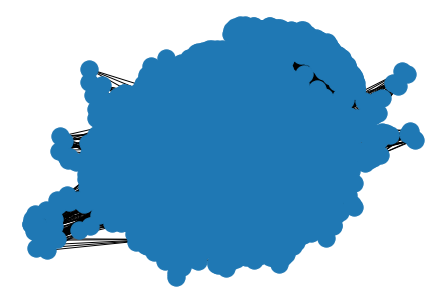

In [27]:
nx.draw(G)  # networkx draw()
plt.draw()

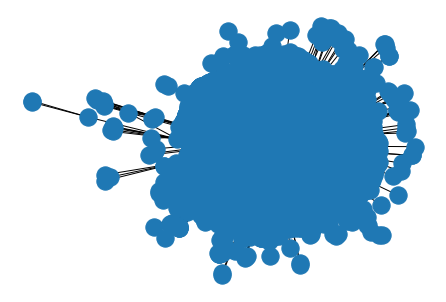

In [28]:
nx.draw(G_filtered)  # networkx draw()
plt.draw()

AttributeError: 'set' object has no attribute 'edges'

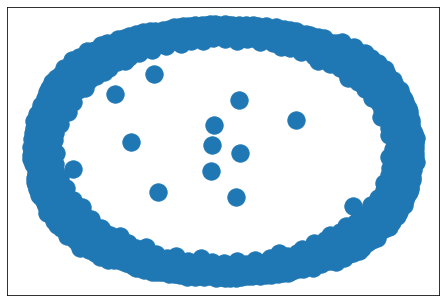

In [29]:
nx.draw(isolates)  # networkx draw()
plt.draw()

In [30]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0024419184322548642


TypeError: 'float' object is not iterable

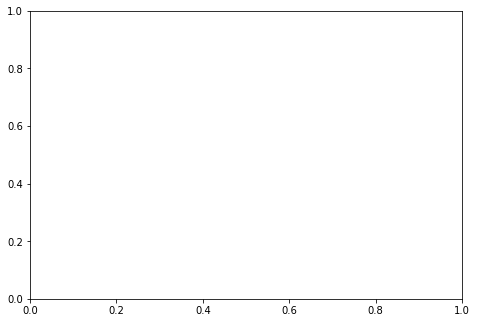

In [31]:
nx.draw(density)  # networkx draw()
plt.draw()

In [80]:
#DIVERSITY
#Calculate Distinctiveness Centrality
DC = distinctiveness(G_filtered, normalize = False, alpha = 1)
DIVERSITY_sequence=DC["D2"]

#Calculate average score and standard deviation
avgDI = np.mean(list(DIVERSITY_sequence.values()))
stdDI = np.std(list(DIVERSITY_sequence.values()))
#Calculate standardized Diversity for each brand
DIVERSITY = {}
for brand in brands:
    DIVERSITY[brand] = (DIVERSITY_sequence[brand] - avgDI) / stdDI
    print("Diversity", brand, DIVERSITY[brand])

Diversity pepsi 3.40941313150371
Diversity cocacola 3.11831125437414
Diversity alpura -0.06799833576387254
Diversity lala 0.8426372362537659
Diversity bimbo 7.416126815681512
Diversity colgate 0.7787982421496639


No handles with labels found to put in legend.


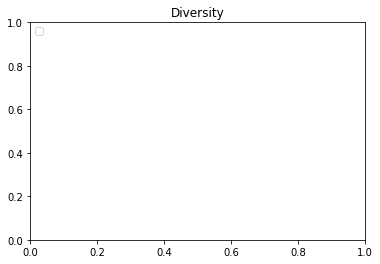

In [34]:
for brand in brands:
    DIVERSITY[brand] = (DIVERSITY_sequence[brand] - avgDI) / stdDI
plt.title("Diversity")
plt.legend(loc='upper left')
plt.show()

In [81]:
for u,v,data in G_filtered.edges(data=True):
    if 'weight' in data and data['weight'] != 0:
        data['inverse'] = 1/data['weight']
    else:
        data['inverse'] = 1   

#CONNECTIVITY
CONNECTIVITY_sequence=nx.betweenness_centrality(G_filtered, normalized=False, weight ='inverse')
#Calculate average score and standard deviation
avgCO = np.mean(list(CONNECTIVITY_sequence.values()))
stdCO = np.std(list(CONNECTIVITY_sequence.values()))
#Calculate standardized Prevalence for each brand
CONNECTIVITY = {}
for brand in brands:
    CONNECTIVITY[brand] = (CONNECTIVITY_sequence[brand] - avgCO) / stdCO
    print("Connectivity", brand, CONNECTIVITY[brand])

Connectivity pepsi 0.8341009294471345
Connectivity cocacola 0.8321807556556206
Connectivity alpura -0.03248241825778557
Connectivity lala 0.08006462006407089
Connectivity bimbo 5.736191726920187
Connectivity colgate 0.06250493506077501


No handles with labels found to put in legend.


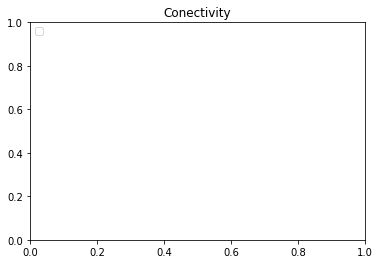

In [36]:
CONNECTIVITY = {}
for brand in brands:
    CONNECTIVITY[brand] = (CONNECTIVITY_sequence[brand] - avgCO) / stdCO
plt.title("Conectivity")
plt.legend(loc='upper left')
plt.show()

In [82]:
SBS = {}
for brand in brands:
    SBS[brand] = PREVALENCE[brand] + DIVERSITY[brand] + CONNECTIVITY[brand]
    print("SBS", brand, SBS[brand])

SBS pepsi 10.646443326038705
SBS cocacola 4.943613434231263
SBS alpura -0.1623546499055583
SBS lala 1.246397998940485
SBS bimbo 15.81782044057087
SBS colgate 0.8716822353250381


No handles with labels found to put in legend.


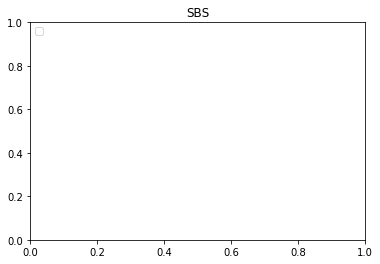

In [39]:
SBS = {}
for brand in brands:
    SBS[brand] = PREVALENCE[brand] + DIVERSITY[brand] + CONNECTIVITY[brand]
plt.title("SBS")
plt.legend(loc='upper left')
plt.show()

In [83]:
#Generate a final pandas data frame with all results

PREVALENCE = pd.DataFrame.from_dict(PREVALENCE, orient="index", columns = ["PREVALENCE"])
DIVERSITY = pd.DataFrame.from_dict(DIVERSITY, orient="index", columns = ["DIVERSITY"])
CONNECTIVITY = pd.DataFrame.from_dict(CONNECTIVITY, orient="index", columns = ["CONNECTIVITY"])
SBS = pd.DataFrame.from_dict(SBS, orient="index", columns = ["SBS"])



In [84]:
PREVALENCE = pd.DataFrame.from_dict(PREVALENCE, orient="index", columns = ["PREVALENCE"])
PREVALENCE.to_csv('prevalence.csv')
DIVERSITY = pd.DataFrame.from_dict(DIVERSITY, orient="index", columns = ["DIVERSITY"])
DIVERSITY.to_csv('diversity.csv')
CONNECTIVITY = pd.DataFrame.from_dict(CONNECTIVITY, orient="index", columns = ["CONNECTIVITY"])
CONNECTIVITY.to_csv('conectivity.csv')
SBS = pd.DataFrame.from_dict(SBS, orient="index", columns = ["SBS"])
SBS.to_csv('semanticbrandscore.csv')

TypeError: 'numpy.ndarray' object is not callable

In [89]:
SBS = pd.DataFrame.from_dict(SBS, orient="index", columns = ["SBS"])
SBS.to_csv('semanticbrandscore.csv')

TypeError: 'numpy.ndarray' object is not callable

In [85]:
SBS = pd.concat([PREVALENCE, DIVERSITY, CONNECTIVITY, SBS], axis=1, sort=False)
SBS

,PREVALENCE,DIVERSITY,CONNECTIVITY,SBS
pepsi,6.402929,3.409413,0.834101,10.646443
cocacola,0.993121,3.118311,0.832181,4.943613
alpura,-0.061874,-0.067998,-0.032482,-0.162355
lala,0.323696,0.842637,0.080065,1.246398
bimbo,2.665502,7.416127,5.736192,15.817820
colgate,0.030379,0.778798,0.062505,0.871682


In [42]:
PREVALENCE = pd.DataFrame.from_dict(PREVALENCE, orient="index", columns = ["PREVALENCE"])
PREVALENCE.to_csv('prevalence.csv')
DIVERSITY = pd.DataFrame.from_dict(DIVERSITY, orient="index", columns = ["DIVERSITY"])
DIVERSITY.to_csv('diversity.csv')
CONNECTIVITY = pd.DataFrame.from_dict(CONNECTIVITY, orient="index", columns = ["CONNECTIVITY"])
CONNECTIVITY.to_csv('conectivity.csv')
SBS = pd.DataFrame.from_dict(SBS, orient="index", columns = ["SBS"])
SBS.to_csv('semanticbrandscore.csv')

TypeError: 'numpy.ndarray' object is not callable

In [93]:
SBSDF = pd.DataFrame(SBS, columns = ["SBS"])
SBSDF.to_csv('semanticbrandscore.csv')

In [ ]:
Prevalence = list(SBS.PREVALENCE)
Diversity = list(SBS.DIVERSITY)
Conectivity = list(SBS.CONNECTIVITY)
  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(Prevalence, Diversity, Conectivity, width)
p2 = plt.bar(Prevalence, Diversity, Conectivity
             )
 
plt.ylabel('Contribution')
plt.title('Contribution by the teams')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('boys', 'girls'))
 
plt.show()

In [ ]:
data1= PREVALENCE[brand]
data2= DIVERSITY[brand]
data3= CONNECTIVITY[brand]

year=brands

plt.figure(figsize=(9,7))
plt.bar(year,data3,color="green",label="Python")
plt.bar(year,data2,color="yellow",bottom=np.array(data3),label="JavaScript")
plt.bar(year,data1,color="red",bottom=np.array(data3)+np.array(data2),label="C++")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()